In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
import io


In [2]:
# Upload the dataset
print("Please upload your CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Get the filename of the uploaded file

Please upload your CSV file


Saving data (1).csv to data (1).csv


In [3]:
# Read the uploaded CSV
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display basic information about the dataset
print("\nDataset Preview:")
print(df.head())
print("\nDataset Columns:", df.columns.tolist())


Dataset Preview:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

Dataset Columns: ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


In [4]:
# Check if 'footfall' column exists, if not let user select a column
if 'footfall' not in df.columns:
    print("\nThe 'footfall' column was not found in the dataset.")
    print("Available columns:", df.columns.tolist())
    target_column = input("Please enter the name of the column to analyze: ")
else:
    target_column = 'footfall'

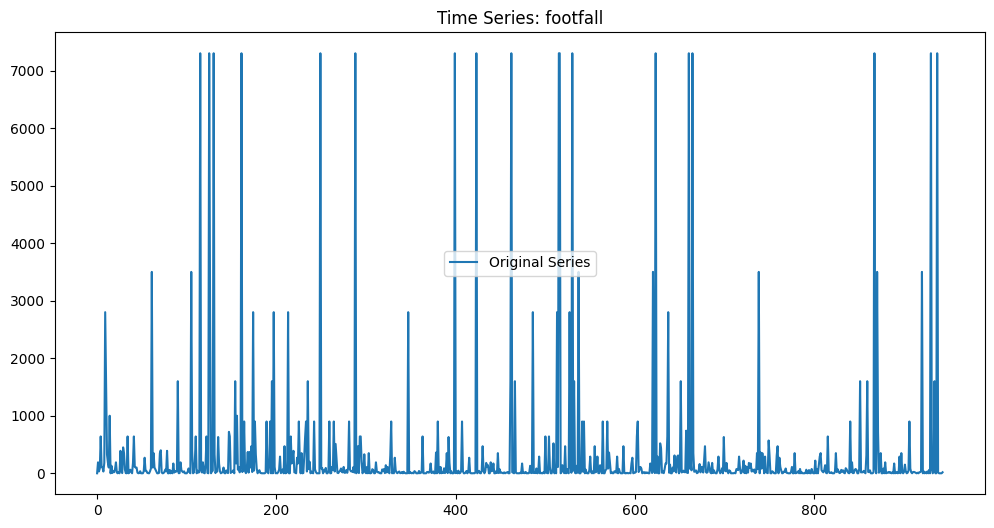

In [6]:
# Use the selected column as the time series
series = df[target_column]

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series')
plt.title(f'Time Series: {target_column}')
plt.legend()
plt.show()

In [7]:
# Train ARIMA model (p=2, d=1, q=2 as a starting point, can be tuned)
print("\nTraining ARIMA model...")
model = ARIMA(series, order=(2, 1, 2))
model_fit = model.fit()

# Display model summary
print("\nARIMA Model Summary:")
print(model_fit.summary())


Training ARIMA model...

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               footfall   No. Observations:                  944
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7928.618
Date:                Sun, 23 Mar 2025   AIC                          15867.235
Time:                        07:14:38   BIC                          15891.480
Sample:                             0   HQIC                         15876.476
                                - 944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9326      0.045    -20.905      0.000      -1.020      -0.845
ar.L2          0.0168      0.025      0.661      0.509      -0.033       0.067
ma.L1

In [9]:
# Predict values, adjusting the prediction range
predictions = model_fit.predict(start=1, end=len(series) -1)  # Adjusted end point

# Compute residuals
residuals = series[1:].values - predictions # Now shapes should match

In [10]:
# Calculate threshold for anomaly detection
threshold = np.mean(np.abs(residuals)) + 3 * np.std(np.abs(residuals))
df_result = df.copy()
df_result.loc[1:, "anomaly"] = np.where(np.abs(residuals) > threshold, 1, 0)

# Count anomalies
anomaly_count = df_result["anomaly"].sum()
print(f"\nDetected {anomaly_count} anomalies out of {len(residuals)} points")


Detected 18.0 anomalies out of 943 points


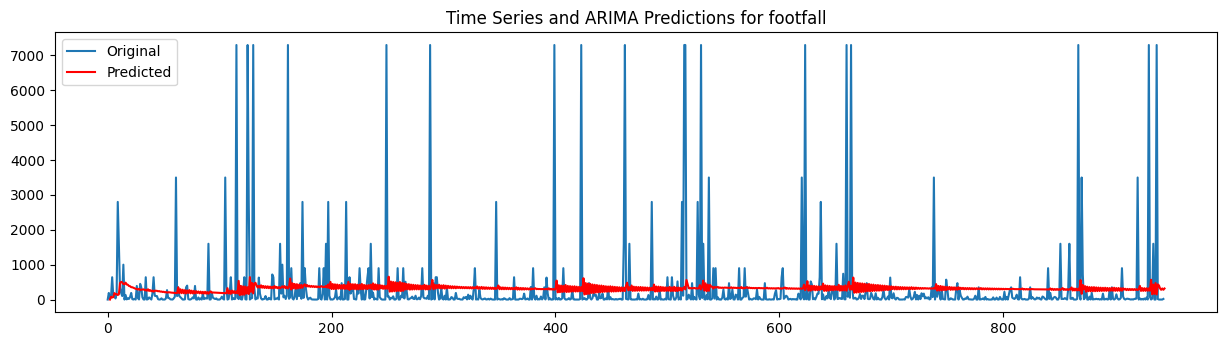

In [11]:
# Plot time series with predictions and anomalies
plt.figure(figsize=(15, 8))

# Original series and predictions
plt.subplot(2, 1, 1)
plt.plot(series, label='Original')
plt.plot(range(1, len(series) + 1),
         [None] + predictions.tolist(),
         color='red',
         label='Predicted')
plt.title(f'Time Series and ARIMA Predictions for {target_column}')
plt.legend()

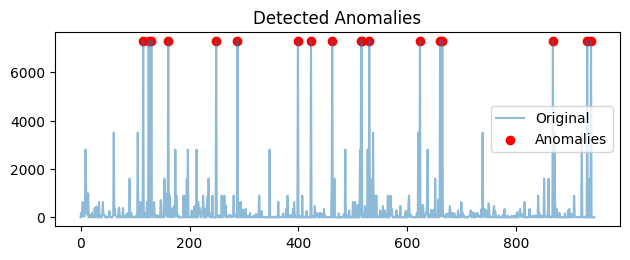

In [12]:
# Anomalies highlighted
plt.subplot(2, 1, 2)
plt.plot(series, label='Original', alpha=0.5)
anomaly_points = df_result.loc[df_result["anomaly"] == 1].index
anomaly_values = series[anomaly_points]
plt.scatter(anomaly_points, anomaly_values, color='red', label='Anomalies')
plt.title('Detected Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Save results to CSV and download
df_result.to_csv('arima_anomaly_detection_results.csv', index=False)
files.download('arima_anomaly_detection_results.csv')

print("\nARIMA-based anomaly detection complete.")
print("Results saved to 'arima_anomaly_detection_results.csv' and downloaded to your computer.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ARIMA-based anomaly detection complete.
Results saved to 'arima_anomaly_detection_results.csv' and downloaded to your computer.
